In [55]:
import os
from os.path import expanduser
import socket
import sys


# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "awi-models")
elif running_system[0:1] == "b" or running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"awi-models")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules")
#########################################

computer =  bcn1192
working directory set to /home/hbkoziel/awi-models


In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
from load_mesh_data_new import *
import numpy as np
import datetime as dt
from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
import colormaps as cmaps
from matplotlib.colors import ListedColormap

In [57]:
# PLOT CONFIGURATION #

# load colormaps #
cmap = plt.get_cmap('RdBu_r')
# figure export 
export_plot = True
# figure export definition
dpicnt=150
# choose simulation
runid='Arc12'
# choose date
first_year = 1990
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
months =np.linspace(0,11,12).astype(int)
# choose depth
get3d = False
# load the given biological tracer #
var_id1, var_id2 = 'diags_bio1_mean','diags_bio2_mean'

########################

# AUTOMATIC DEFINITION OF PATHS
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/Oldfiles/'
savepath    = wd_path+'/figures/'+runid+'/'
meshpath    = wd_path+'/data/mesh/meshArc4.5/'

# Create figure directory if it does not exist
if os.path.exists(savepath) == False:
    try:
        os.mkdir(savepath)
        print ("Creation of the directory %s successfull" % savepath)
    except OSError:
        print ("Creation of the directory %s failed" % savepath)
else:
    print ("directory %s already existing" % savepath)
    
ncfile      = resultpath+runid+'.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalArea2D = f.variables['cluster_area'][:]

directory /home/hbkoziel/awi-models/figures/Arc12/ already existing


In [58]:
mesh = fesom_mesh(meshpath, get3d = get3d)
#mesh = load_mesh(meshpath)

Load 2d part of the grid in 3 second(s)


In [59]:
# initlialyze
NPP = np.empty((len(years),mesh.n2d))
DATE = np.empty((len(years)))

# loop over years
for ind in range(0,len(years)):
     print years[ind]
     ncfile = resultpath+runid+'.'+str(years[ind])+'.bio.mean.nc'
     f      = Dataset(ncfile, 'r')
     npp1    = f.variables[var_id1][:,0:mesh.n2d].mean(axis=0)
     npp2    = f.variables[var_id2][:,0:mesh.n2d].mean(axis=0)
     #if years[ind]<2000:
     #    NPPtotal   = 30*(npp1+npp2)
     #else:
     #    NPPtotal   = 2*(npp1+npp2)
     NPPtotal = npp1+npp2
     #NPPtotal       = 365 * NPPtotal # Conversion from [mg/m2/day]   => [mg/m2/yr]
     #NPPtotal1 = np.sum(NPPtotal*NodalArea2D[:,0:mesh.n2d])/1e18 # [Pg C/year]
     NPP[ind,:] = NPPtotal[:] * 12.01 # convert mmols in mgrams

1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


In [79]:
#print din.shape
print NPP.shape
print years.shape

(26, 753179)
(26,)


In [131]:
#result_fit = np.ma.polyfit(years[0:-1],NPP[0:-1,:],1)
result_fit = np.ma.polyfit(years,NPP,deg=1)
#m, c = np.linalg.lstsq(NPP,years,rcond=None)[0]

In [132]:
data2 = result_fit[0,:]
print data2.mean()
print data2.std()
print data2.min()
print data2.max()

0.5956113111898893
1.4158793632710414
-10.119792920750038
30.041572941835955


0.573114245486181
1.2780460329954935
-7.87777961456299
9.898499743072724
ftriplot, number of dummy points: 0


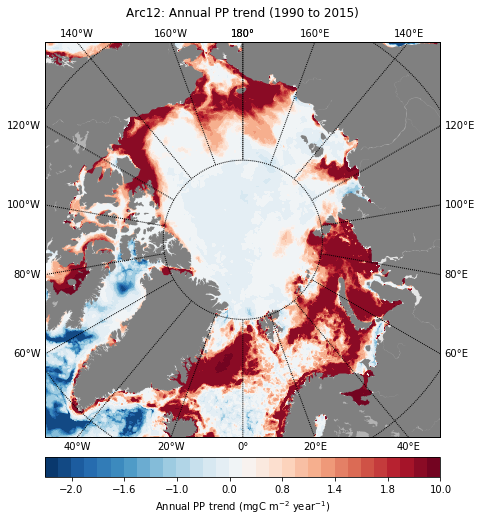

In [135]:
del elem2 
del d

#contours = [-1.7, 1.7, 0.1]
#contours = np.arange(contours[0], contours[1]+contours[2], contours[2])

contours = np.array([-10,-5, -2,-1.9,-1.8,-1.7,-1.6,-1.5,-1.4, -1.3, -1, -0.9, -0.8, -0.5, 0, 0.5, 0.6, 0.7, 0.8,0.9, 1, 1.3, 1.4, 1.5,1.6,1.7,1.8,1.9,2,5,10])
#contours=np.array([-600, -500, -400, -300, -200, -100, -80, -50, -30, -20, -10, -8, -5, -3, -2, -1, 0, 1, 2, 3, 5, 8, 10, 20, 30, 50, 80, 100, 200, 300, 400, 500, 600])


fig = plt.figure(figsize=(8,8), facecolor='w', edgecolor='k')
elem2=mesh.elem#[mesh.no_cyclic_elem,:]
d=data2[elem2].mean(axis=1)
print d.mean()
print d.std()
print d.min()
print d.max()
k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
elem2=elem2[k,:]
print 'ftriplot, number of dummy points:', len(d)-len(k)		
map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = map(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[True,True,True,True]    
map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem2, data2, levels=contours, cmap=cmap, norm=PiecewiseNorm(contours))
label = runid+': Annual PP trend ('+str(years[0])+' to '+str(years[len(years)-1])+')'
plt.title(label,y=1.05)
cbar=map.colorbar(im,"bottom", size="5%", pad="5%")
cbar.set_label(r'Annual PP trend (mgC m$^{-2}$ year$^{-1}$)')
    
if export_plot == True:
    plt.savefig(savepath+'PPspatial_trend_'+str(years[0])+'_'+str(years[-1])+'.png', dpi = dpicnt, bbox_inches='tight') 
        
plt.show() 

In [136]:
#fig = plt.figure(figsize=(8,8), facecolor='w', edgecolor='k')
#n=0
#plt.plot(years,NPP[:,n])
#plt.plot(years,result_fit[0,n]*years+result_fit[1,n])
#print result_fit[0,n]